In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt
import math
import plotly.plotly as py
import plotly.tools as tls
import cufflinks as cf
print(cf.__version__)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from summarize import df_summary

0.15


Makes Jupyter output long rather than in scrolly box!

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Mall Customers
Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

You can load the data set like this:

import seaborn as sns

sns.load_dataset('tips')

In [3]:
import seaborn as sns

tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips['is_male'] = np.where(tips['sex'] == 'Male', 1, 0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,is_male
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [6]:
tips['is_smoker'] = np.where(tips['smoker'] == 'Yes', 1, 0)
tips['is_smoker'].value_counts()

0    151
1     93
Name: is_smoker, dtype: int64

In [7]:
tips['is_dinner'] = np.where(tips['time'] == 'Dinner', 1, 0)
tips['is_dinner'].value_counts()

1    176
0     68
Name: is_dinner, dtype: int64

In [8]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
tips['is_weekend'] = np.where((tips['day'].isin(['Sat', 'Sun'])), 1, 0)
tips['is_weekend'].value_counts()

1    163
0     81
Name: is_weekend, dtype: int64

In [10]:
tips['tip_perc'] = tips['tip'] / tips['total_bill']
tips['tip_perc'].max(), tips['tip_perc'].min()

(0.710344827586207, 0.03563813585135547)

In [11]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,is_male,is_smoker,is_dinner,is_weekend,tip_perc
195,7.56,1.44,Male,No,Thur,Lunch,2,1,0,0,0,0.190476
213,13.27,2.50,Female,Yes,Sat,Dinner,2,0,1,1,1,0.188395
104,20.92,4.08,Female,No,Sat,Dinner,2,0,0,1,1,0.195029
167,31.71,4.50,Male,No,Sun,Dinner,4,1,0,1,1,0.141911
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0,1,1,1,0.056433


In [12]:
tips_nums = tips.select_dtypes('number')
tips_nums.drop(columns=['total_bill', 'tip'], inplace=True)
tips_nums.sample(10)

,size,is_male,is_smoker,is_dinner,is_weekend,tip_perc
3,2,1,0,1,1,0.139780
210,3,1,1,1,1,0.066534
73,2,0,1,1,1,0.197785
157,4,0,0,1,1,0.150000
24,2,1,0,1,1,0.160444
75,2,1,0,1,1,0.118934
139,2,0,0,0,0,0.208967
110,2,1,0,1,1,0.214286
33,4,0,0,1,1,0.118415
184,2,1,1,1,1,0.073983


In [13]:
df_summary(tips_nums)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
--- Top and Bottom:
Sorted by size:
Head:
      67   82   222
size    1    1    1
 
Tail: 
      156  141  125
size    6    6    6
-----
Sorted by is_male:
Head:
         0    139  137
is_male    0    0    0
 
Tail: 
         41   39   156
is_male    1    1    1
-----
Sorted by is_smoker:
Head:
           0    120  242
is_smoker    0    0    0
 
Tail: 
           171  194  186
is_smoker    1    1    1
-----
Sorted by is_dinner:
Head:
           121  145  146
is_dinner    0    0    0
 
Tail: 
           76   52   243
is_dinner    1    1    1
-----
Sorted by is_weekend:
Head:
            121  101  117
is_weekend    0    0    0
 
Tail: 
            35  33  0 
is_weekend   1   1   1
-----
Sorted by tip_perc:
Head:
               237       102       57 
tip_perc  0.035638  0.056433  0.056797
 
Tail: 
               67        178       172
tip_perc  0.325733  0.416667  0.710345
-----
None

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
---

In [14]:
tips_nums.head()

,size,is_male,is_smoker,is_dinner,is_weekend,tip_perc
0,2,0,0,1,1,0.059447
1,3,1,0,1,1,0.160542
2,3,1,0,1,1,0.166587
3,2,1,0,1,1,0.139780
4,4,0,0,1,1,0.146808


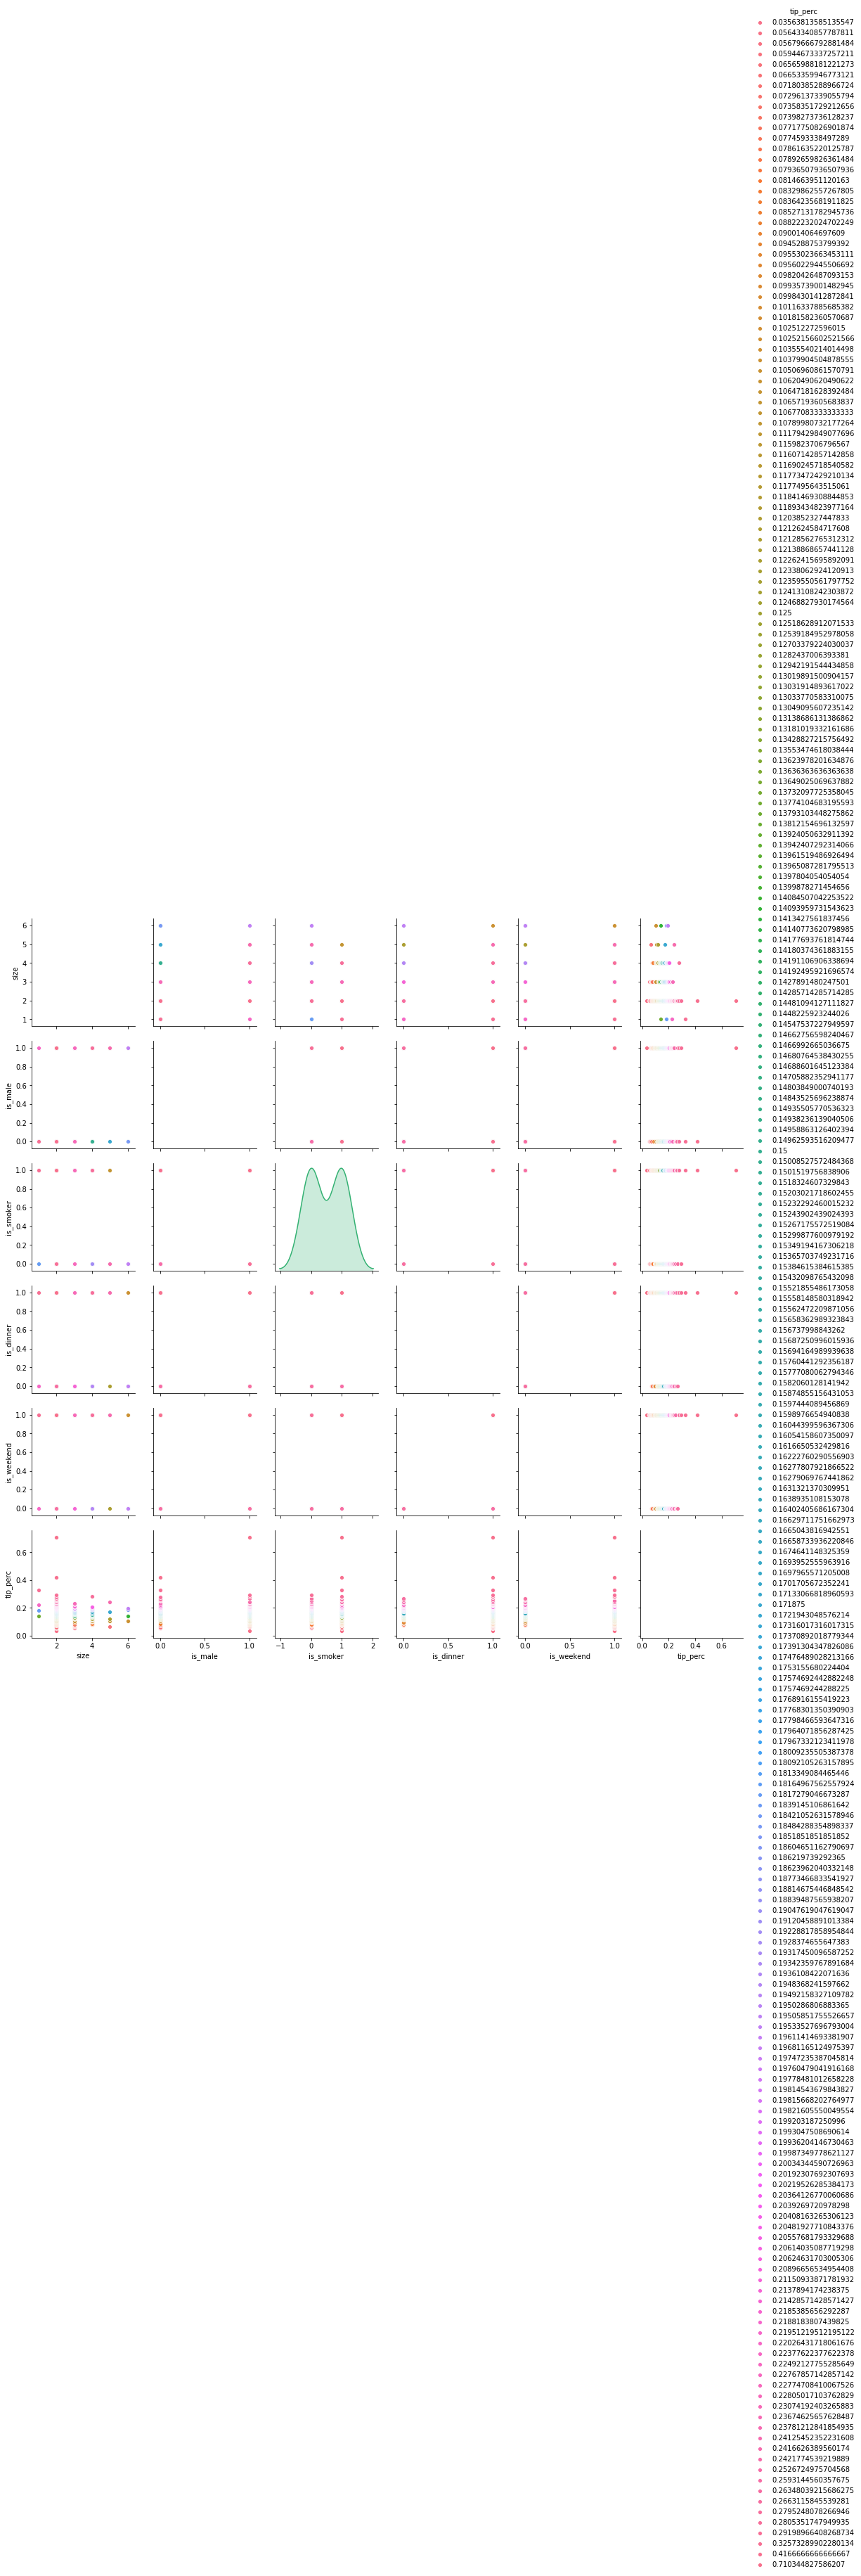

In [41]:
sns.pairplot(tips_nums, hue='tip_perc')

In [15]:
tips_nums.iplot(kind='box')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
data = [go.Heatmap(z=tips_nums.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

